## Ensemble Methods

- ensemble estimate: $\bar{y} = \frac{1}{K} \sum_{k=1}^K \hat{y}_k$
- squared error of the ensemble estimate: $\left(\bar{y} - y\right)^2$
- decomposition into an accuracy and diversity term: $\left(\bar{y} - y\right)^2 = \frac{1}{K} \sum_{k=1}^K (\hat{y}_k - y)^2 - \frac{1}{K}\sum_{k=1}^K (\hat{y}_k - \bar{y})^2$
- the ensemble will work well, if the members are diverse and individually accurate

<img src="../_img/ensemble.jpg" width="350px" align="left">

## Random Forest

[Random forest](https://en.wikipedia.org/wiki/Random_forest) is a tree based algorithm for classification and regression. It can be viewed as a "parallel circuit" of decision trees. The output of the forest is the average output of its trees. Some methods to grow an accurate and diverse set of trees are as follows:

- [Bootstrapping](https://en.wikipedia.org/wiki/Bootstrap_aggregating): Each tree is trained on a data set that was sampled from the original data with replacement.


- [Feature bagging](https://en.wikipedia.org/wiki/Random_subspace_method): Each tree is trained on a random subset of the features.


- [Extreme randomization](https://en.wikipedia.org/wiki/Random_forest#ExtraTrees): For each feature, a random split value is used instead of the optimal one.

**Exercise 1**: Implement a bootstrapping based random forest regressor and evaluate it on the Boston Housing data set using 3-fold cross-validation! The evaluation metric should be RMSE!

In [1]:
# Load the data to DataFrame.
import pandas as pd
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
         'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
df = pd.read_csv('housing_data.txt', delim_whitespace=True, names=names)
df = df.sample(len(df), random_state=42) # shuffle the data
X = df[df.columns[:-1]].values           # input matrix
y = df['MEDV'].values                    # target vector

In [2]:
class SimpleRandomForestRegressor:
    def __init__(self, n_trees=100, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
    
    def fit(self, X, y):
        rs = np.random.RandomState(42)

        self.trees = []
        for k in range(self.n_trees):
            idxs = rs.randint(0, len(y), len(y))                                 # bootstrapping
            re = DecisionTreeRegressor(max_depth=self.max_depth, random_state=k) # create decision tree
            re.fit(X[idxs], y[idxs])                                             # train decision tree
            self.trees.append(re)
    
    def predict(self, X):
        yhat = np.zeros(len(X))
        for re in self.trees:
            yhat += re.predict(X)
        return yhat / len(self.trees)

In [3]:
# bootstrapping 
import numpy as np
from sklearn.tree import DecisionTreeRegressor

rs = np.random.RandomState(42)

idxs = rs.randint(0, len(y), len(y))

In [4]:
len(idxs), len(set(idxs))

(506, 302)

In [5]:
re = DecisionTreeRegressor()
re.fit(X[idxs], y[idxs])

DecisionTreeRegressor()

In [6]:
# testing the fit in the class
re = SimpleRandomForestRegressor()
re.fit(X, y)
re.trees[1].tree_.feature

array([11,  5,  7, -2,  5,  9, -2,  5,  9, 10,  6, -2, -2,  2,  0, -2,  0,
       10,  4, -2, -2, -2,  7, -2, -2, 11,  4, -2, -2,  9,  0,  1, -2, -2,
        9, 11, -2, -2, 11, -2, -2, -2, -2,  5,  2,  9, -2, 11,  0,  1,  6,
        4, -2, -2,  1,  0, -2, -2,  1, -2, -2, -2,  9, -2,  8, -2,  7, -2,
       -2, -2, 10,  5,  2, -2, -2, 11, -2, -2, 10,  6, -2,  1,  5, -2, -2,
       -2,  5,  5, 11, -2, -2, -2,  0,  4, -2,  0, -2, 10, -2, -2,  7, -2,
       -2, -2,  5, 11,  5,  2,  5, 11,  3,  5, -2, -2, -2,  6,  8, -2, -2,
        7, -2,  2, -2, -2, -2, 11, -2, -2,  2,  9, -2,  7,  2, -2, -2, -2,
       -2,  4, 10, 11,  0, 11, -2, -2, 11, -2, -2,  2, -2, -2,  8, -2, -2,
       10,  7, -2,  6,  7,  6, -2,  7, 11, -2, -2,  8, -2, -2,  3, -2, -2,
       10, -2, -2,  6, 10, 11, -2, -2,  9, -2, -2,  9,  6,  2, -2, -2, -2,
       -2,  9,  5,  1,  7, -2, -2,  0, 11, -2, -2,  9, -2, -2,  3, -2, -2,
       11, -2,  4, 11,  5,  7, -2, -2,  4, -2, -2, -2,  4, -2, -2,  0,  8,
        4, 10, -2, -2, -2

In [7]:
# testing the predict in the class
re = SimpleRandomForestRegressor()
re.fit(X, y)
re.predict(X)

array([23.37 , 31.963, 14.525, 22.815, 15.96 , 20.401, 18.19 , 14.204,
       20.182, 17.925, 21.025, 18.99 ,  7.346, 21.122, 18.789, 28.384,
       19.137,  9.301, 49.132, 14.137, 25.322, 27.413, 13.561, 22.907,
       14.574, 13.988, 20.518, 14.814, 20.857, 18.934, 22.116, 23.808,
       22.788, 20.974, 17.365, 18.08 , 34.564, 19.34 , 23.346, 23.554,
       19.532, 28.426, 49.217, 17.864, 22.625, 14.733, 13.7  , 24.118,
       19.29 , 25.845, 19.697, 34.86 , 15.083, 26.543, 44.135, 21.424,
       17.244, 30.019, 23.423, 19.232, 25.186, 34.898, 31.569, 19.894,
       25.418, 19.074, 13.455, 24.331, 29.993, 14.163, 20.001, 25.581,
       10.439, 20.714, 20.958,  5.637, 19.987, 48.466, 10.805,  9.544,
       20.842, 16.466, 20.496,  9.745, 19.684, 28.353, 16.1  , 24.501,
       24.773, 17.428, 22.672,  9.688, 19.953, 17.88 , 25.142, 21.852,
       45.143, 15.814, 10.894, 16.385, 21.752, 22.197, 12.542, 19.919,
       20.045, 13.853, 18.735, 24.512, 20.793, 23.827,  8.814, 25.076,
      

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def evaluate(re, X, y):
    cv = KFold(3, random_state=42, shuffle=True)

    scores_tr = []
    scores_te = []
    for tr, te in cv.split(X):
        re.fit(X[tr], y[tr])
        yhat = re.predict(X)
        scores_tr.append(mean_squared_error(y[tr], yhat[tr])**0.5)
        scores_te.append(mean_squared_error(y[te], yhat[te])**0.5)

    return np.mean(scores_tr), np.mean(scores_te)

In [9]:
evaluate(SimpleRandomForestRegressor(), X, y)

(1.2496535188109161, 3.5344184688013613)

In [10]:
evaluate(DecisionTreeRegressor(random_state=42), X, y)

(0.0, 4.867211481330203)

In [11]:
from sklearn.linear_model import Ridge
evaluate(Ridge(), X, y)

(4.710820669783009, 4.927289718141437)

In [12]:
# How the test RMSE depends on the number of trees.
res = []
for n_trees in range(1, 101):
    print(n_trees)
    re = SimpleRandomForestRegressor(n_trees=n_trees)
    _, rmse_te = evaluate(re, X, y)
    res.append({'n_trees': n_trees, 'rmse_te': rmse_te})

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [13]:
df_res = pd.DataFrame(res).set_index('n_trees')
df_res

,rmse_te
n_trees,
1,4.732256
2,4.056692
3,3.960604
4,3.891775
5,3.900339
...,...
96,3.539245
97,3.538955
98,3.541483


<AxesSubplot: xlabel='n_trees'>

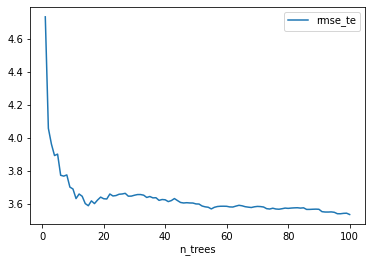

In [14]:
df_res.plot()

**Exercise 2**: Implement a feature bagging based random forest regressor and evaluate it on the Boston Housing data set using 3-fold cross-validation!

In [15]:
class SimpleRandomForestRegressor:
    def __init__(self, n_trees=100, max_depth=None, bootstrap=True, feat_bag=False):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.bootstrap = bootstrap
        self.feat_bag = feat_bag
        
    
    def fit(self, X, y):
        rs = np.random.RandomState(42)
        n, d = X.shape

        self.trees = []
        for k in range(self.n_trees):
            row_idxs = np.arange(n)
            if self.bootstrap:
                row_idxs = rs.randint(0, n, n)  # bootstrapping
                
            col_idxs = np.arange(d)
            if self.feat_bag:
                col_idxs = rs.randint(0, d, d)  # featur bagging
            
            
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=k) # create decision tree
            tree.fit(X[row_idxs][:, col_idxs], y[row_idxs])                                             # train decision tree
            self.trees.append((tree, col_idxs))
    
    def predict(self, X):
        yhat = np.zeros(len(X))
        for tree, col_idxs in self.trees:
            yhat += tree.predict(X[:, col_idxs])
        return yhat / len(self.trees)

In [16]:
evaluate(SimpleRandomForestRegressor(bootstrap=False, feat_bag=False), X, y)

(3.221869811461758e-14, 4.563463998771837)

In [17]:
evaluate(SimpleRandomForestRegressor(bootstrap=True, feat_bag=False), X, y)

(1.2496535188109161, 3.5344184688013613)

In [18]:
evaluate(SimpleRandomForestRegressor(bootstrap=False, feat_bag=True), X, y)

(0.018271831222768983, 3.746377378818943)

In [19]:
evaluate(SimpleRandomForestRegressor(bootstrap=True, feat_bag=True), X, y)

(1.3106116530969623, 3.65460581683147)

**Exercise 3**: Repeat the previous experiments using scikit-learn's RandomForestRegressor class!

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
# bootstrapping No feature bagging
evaluate(RandomForestRegressor(bootstrap=True, max_features=1.0, random_state=42), X, y)

(1.249721947092092, 3.578281219483339)

In [22]:
# No bootstrapping feature bagging with 50% strategy
evaluate(RandomForestRegressor(bootstrap=False, max_features=0.5, random_state=42), X, y)

(0.0008610326361854645, 3.432009311114937)

In [23]:
# bootstrapping feature bagging with 50% strategy
evaluate(RandomForestRegressor(bootstrap=True, max_features=0.5, random_state=42), X, y)

(1.2368681562001127, 3.464869293320867)

In [24]:
# No bootstrapping No feature bagging
evaluate(RandomForestRegressor(bootstrap=False, max_features=1.0, random_state=42), X, y)

(3.221869811461758e-14, 4.534326812091633)

**Exercise 4**: Plot the training and the test RMSE as a function of the number of trees!

In [25]:
# How the test RMSE depends on the number of trees.
# No bootstrapping with feature bagging
res = []
for n_trees in range(1, 101):
    print(n_trees, end=' ')
    re = RandomForestRegressor(n_estimators=n_trees, bootstrap=False, max_features=0.5, random_state=42)
    rmse_tr, rmse_te = evaluate(re, X, y)
    res.append({'n_trees': n_trees, 'rmse_tr': rmse_tr, 'rmse_te': rmse_te})

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

<AxesSubplot: xlabel='n_trees'>

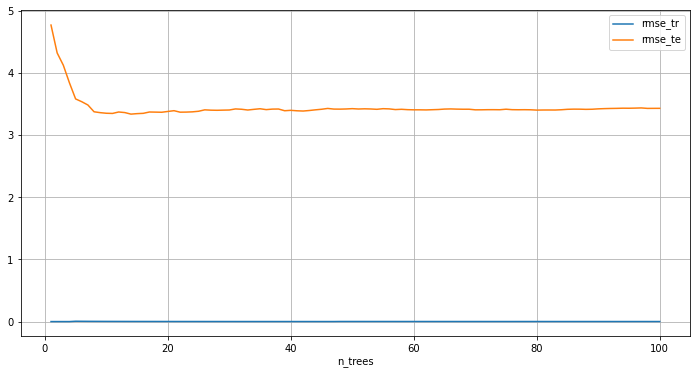

In [27]:
df_res = pd.DataFrame(res).set_index('n_trees')
df_res.plot(figsize=(12,6), grid=True)

In [28]:
# How the test RMSE depends on the number of trees.
# bootstrapping No feature bagging
res = []
for n_trees in range(1, 101):
    print(n_trees, end=' ')
    re = RandomForestRegressor(n_estimators=n_trees, bootstrap=True, max_features=1.0, random_state=42)
    rmse_tr, rmse_te = evaluate(re, X, y)
    res.append({'n_trees': n_trees, 'rmse_tr': rmse_tr, 'rmse_te': rmse_te})

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

<AxesSubplot: xlabel='n_trees'>

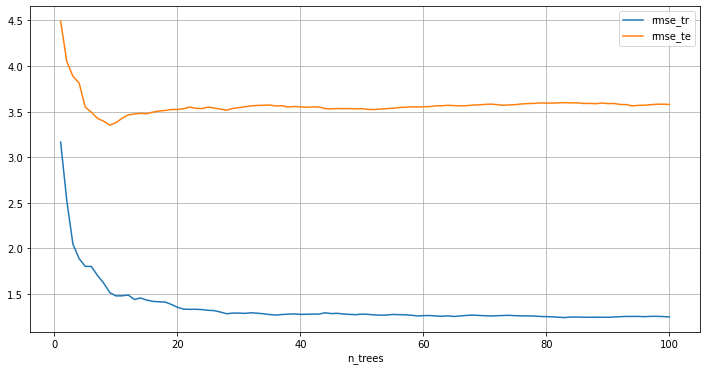

In [29]:
df_res = pd.DataFrame(res).set_index('n_trees')
df_res.plot(figsize=(12,6), grid=True)

**Exercise 5**: Repeat the previous experiment using the "extreme randomization" strategy!

In [30]:
from sklearn.ensemble import ExtraTreesRegressor

In [31]:
evaluate(ExtraTreesRegressor(random_state=42), X, y)

(3.221869811461758e-14, 3.5508313733547276)

In [32]:
res = []
for n_trees in range(1, 101):
    print(n_trees, end=' ')
    re = ExtraTreesRegressor(n_estimators=n_trees, random_state=42)
    rmse_tr, rmse_te = evaluate(re, X, y)
    res.append({'n_trees': n_trees, 'rmse_tr': rmse_tr, 'rmse_te': rmse_te})

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

<AxesSubplot: xlabel='n_trees'>

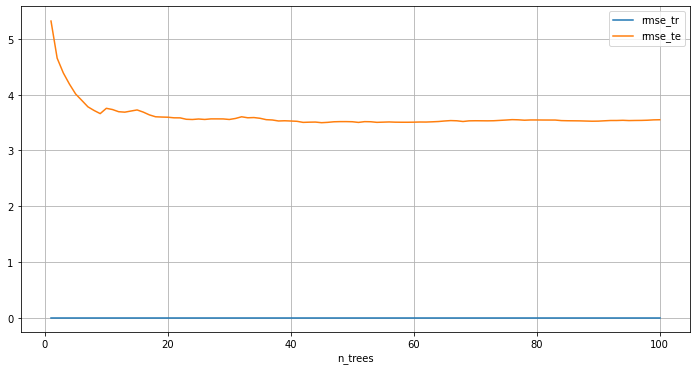

In [33]:
df_res = pd.DataFrame(res).set_index('n_trees')
df_res.plot(figsize=(12,6), grid=True)